In [1]:
from transit_model import TransitModel

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


##### Running transit and rotation fit from scratch

In [2]:
ID = 2162994

lc_path = './test_lightcurves/'
plot_path = './test_plots/'

tm = TransitModel(f'KIC {ID}')

## Download all will download and stitch all of the quarters, rather than using only the first found
# tm = TransitModel(f'KIC {ID}', download_all=True)

tm.fit_model_period()

## fit_model_period() can take a list of period guesses
## In this case, aliases of the initial period estimate
# bls_period = tm.estimate_period()
# period_guesses = [bls_period/2, 2/3 * bls_period, bls_period, bls_period*2]
# tm.fit_model_period(period_guesses=period_guesses)

## fit_model_window() fits for both period and the window parameter for lk's flattening function
# windows = [10*n+1 for n in range(1,11)]
# tm.fit_model_window(period_guesses=period_guesses, windows=windows)

tm.est_duration()
tm.est_eccentricity()
tm.apply_transit_mask()
tm.fit_rotation()

C:\Users\Peter\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [3]:
tm.save_masked_lcs(lc_path)

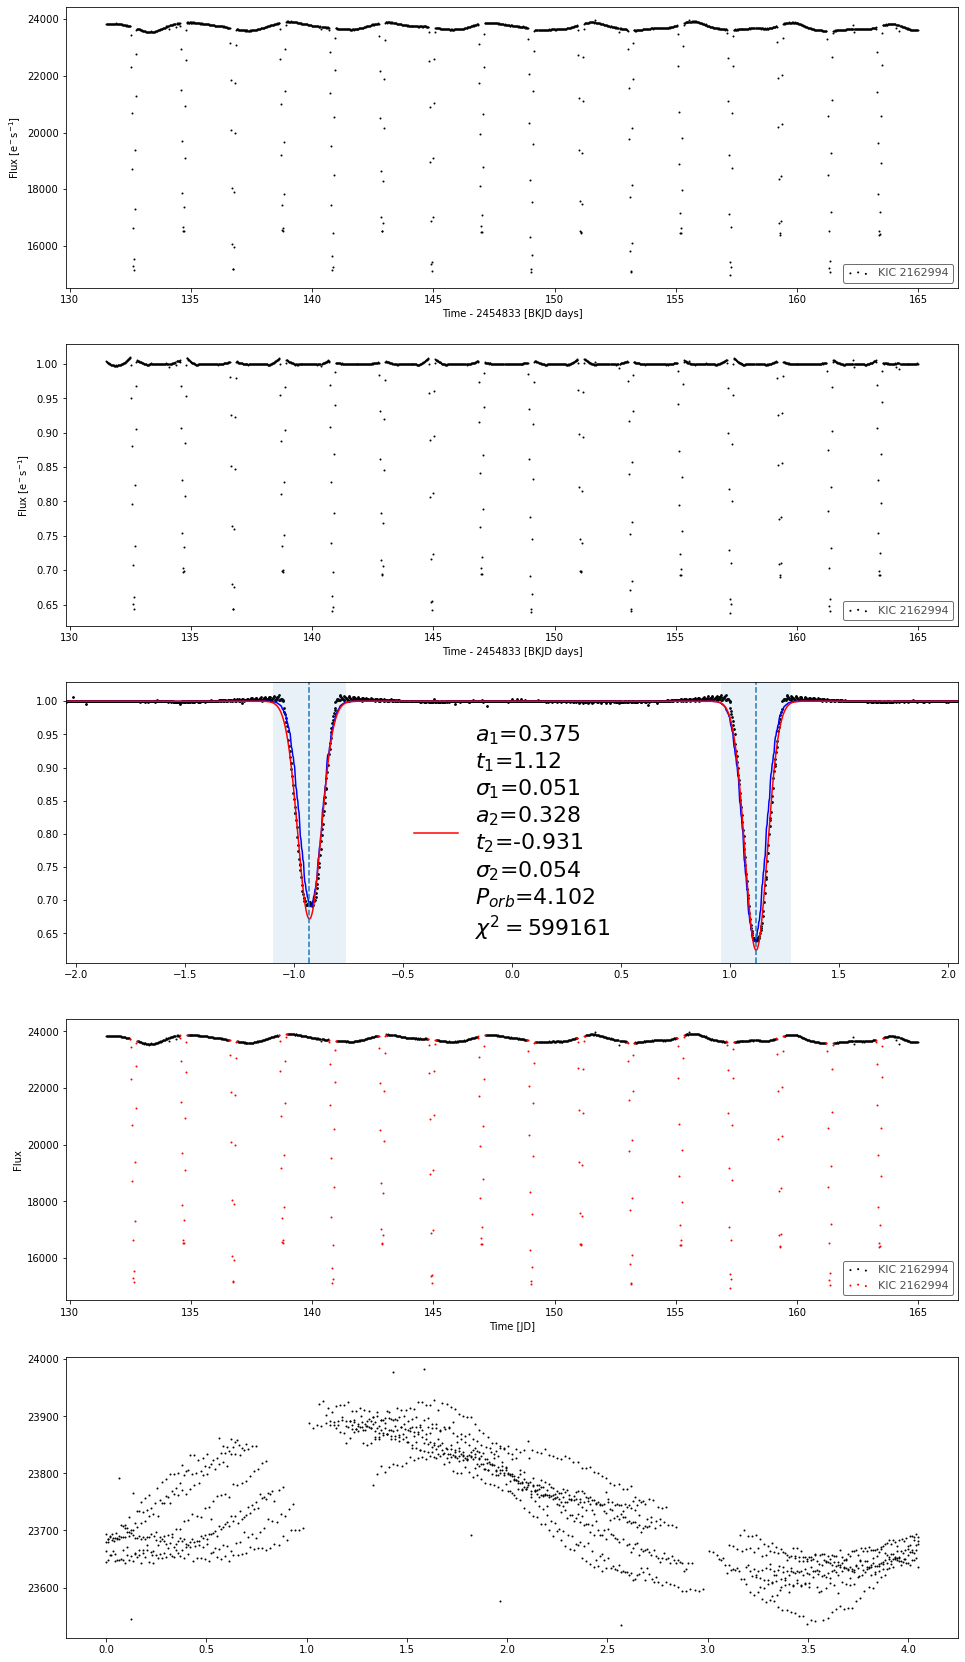

In [4]:
tm.plot_best_fit(save_dir=plot_path)

In [5]:
summary = tm.model_fit_summary()
print(f'P rot: {tm.prot:0.3f} days')
print()
print(summary)

P rot: 4.056 days

{'KICID': 'KIC 2162994', 'window': 51, 'dur1': 0.31790326379751477, 'dur2': 0.33178610721421986, 'ecosw': -1.1845094048526805e-05, 'esinw': 0.02136843241730393, 'ecc': 0.02136843570033002, '$P_{rot}$': 4.056096823671396, '$a_1$': 0.37527180894482015, '$t_1$': 1.1201870830166611, '$\\sigma_1$': 0.05143679055503527, '$a_2$': 0.3281891578749571, '$t_2$': -0.9305461817294307, '$\\sigma_2$': 0.05368303647463751, '$P_{orb}$': 4.101528387275604}


##### Example how to iterate over a list of targets

In [6]:
# import pandas as pd

# ID_list = [3654950, ..., ..., ...]

# lc_path = './test_lightcurves/'
# plot_path = './test_plots/'

# summaries = []

# for ID in ID_list:
#     tm = TransitModel(f'KIC {ID}', download_all=False)
#     tm.fit_model_period()
#     tm.est_duration()
#     tm.est_eccentricity()
#     tm.apply_transit_mask()
#     tm.save_masked_lcs(lc_path)
#     tm.fit_rotation()
#     tm.plot_best_fit(show=False, save_dir=plot_path)

#     summaries.append(tm.model_fit_summary())
    
# df = pd.DataFrame(summaries)